# Project 1 - Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [11]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [12]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data -= train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= train_data.std()
print(train_data.std())

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= test_data.mean(axis=0)
test_data /= test_data.std()
print(test_data.std())

1.0
1.0


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


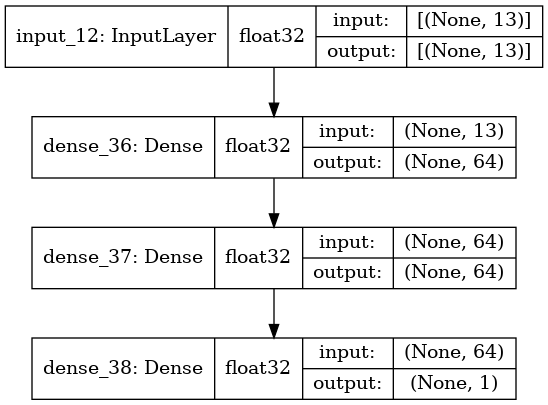

In [35]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

model.summary()

from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, show_dtype=True)

In [36]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
train_len = int(len(train_data) * 0.8)
train_data, val_data = train_data[:train_len], train_data[train_len:]
train_labels, val_labels = train_labels[:train_len], train_labels[train_len:]

history = model.fit(train_data,
                    train_labels,
                    batch_size=10,
                    epochs=200,
                    validation_data=(val_data, val_labels))

Epoch 1/200
26/26 [==============================] - 1s 8ms/step - loss: 473.2342 - mae: 19.8848 - val_loss: 491.5752 - val_mae: 19.5968
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 320.8792 - mae: 15.5762 - val_loss: 307.3535 - val_mae: 14.6545
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 181.0367 - mae: 10.6252 - val_loss: 168.1295 - val_mae: 10.0632
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 102.5853 - mae: 7.4716 - val_loss: 112.4892 - val_mae: 7.6091
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 83.3023 - mae: 6.6452 - val_loss: 100.0138 - val_mae: 7.1443
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 78.0605 - mae: 6.4671 - val_loss: 96.4865 - val_mae: 6.9168
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 72.3368 - mae: 6.1936 - val_loss: 91.3417 - val_mae: 6.6707
Epoch 8/200
26/26 [==============================] - 0

26/26 [==============================] - 0s 3ms/step - loss: 17.6993 - mae: 3.0467 - val_loss: 38.4097 - val_mae: 3.8801
Epoch 63/200
26/26 [==============================] - 0s 3ms/step - loss: 17.6186 - mae: 2.9804 - val_loss: 37.3214 - val_mae: 3.9342
Epoch 64/200
26/26 [==============================] - 0s 3ms/step - loss: 17.3085 - mae: 2.9931 - val_loss: 37.8285 - val_mae: 4.0114
Epoch 65/200
26/26 [==============================] - 0s 3ms/step - loss: 17.2889 - mae: 3.0055 - val_loss: 38.1812 - val_mae: 3.9138
Epoch 66/200
26/26 [==============================] - 0s 3ms/step - loss: 16.8941 - mae: 3.0152 - val_loss: 39.5826 - val_mae: 3.8811
Epoch 67/200
26/26 [==============================] - 0s 4ms/step - loss: 17.0398 - mae: 2.9640 - val_loss: 37.8880 - val_mae: 3.8951
Epoch 68/200
26/26 [==============================] - 0s 3ms/step - loss: 16.8136 - mae: 2.9867 - val_loss: 36.9304 - val_mae: 3.7677
Epoch 69/200
26/26 [==============================] - 0s 3ms/step - loss: 1

26/26 [==============================] - 0s 3ms/step - loss: 11.4008 - mae: 2.4864 - val_loss: 31.4731 - val_mae: 3.5336
Epoch 124/200
26/26 [==============================] - 0s 3ms/step - loss: 11.2965 - mae: 2.5063 - val_loss: 28.2032 - val_mae: 3.5324
Epoch 125/200
26/26 [==============================] - 0s 4ms/step - loss: 11.3990 - mae: 2.4819 - val_loss: 28.1769 - val_mae: 3.4398
Epoch 126/200
26/26 [==============================] - 0s 3ms/step - loss: 11.2458 - mae: 2.4963 - val_loss: 28.9372 - val_mae: 3.4922
Epoch 127/200
26/26 [==============================] - 0s 3ms/step - loss: 10.7805 - mae: 2.4106 - val_loss: 26.2524 - val_mae: 3.6158
Epoch 128/200
26/26 [==============================] - 0s 3ms/step - loss: 11.0514 - mae: 2.4631 - val_loss: 27.0925 - val_mae: 3.5151
Epoch 129/200
26/26 [==============================] - 0s 3ms/step - loss: 11.0354 - mae: 2.4642 - val_loss: 28.7170 - val_mae: 3.5162
Epoch 130/200
26/26 [==============================] - 0s 3ms/step - 

26/26 [==============================] - 0s 3ms/step - loss: 7.9818 - mae: 2.0689 - val_loss: 23.8649 - val_mae: 3.3490
Epoch 185/200
26/26 [==============================] - 0s 3ms/step - loss: 7.8316 - mae: 2.0576 - val_loss: 23.9659 - val_mae: 3.2214
Epoch 186/200
26/26 [==============================] - 0s 3ms/step - loss: 7.6781 - mae: 2.0488 - val_loss: 27.6153 - val_mae: 3.2178
Epoch 187/200
26/26 [==============================] - 0s 3ms/step - loss: 7.9389 - mae: 2.0908 - val_loss: 24.1856 - val_mae: 3.2901
Epoch 188/200
26/26 [==============================] - 0s 3ms/step - loss: 7.8663 - mae: 2.0859 - val_loss: 24.3544 - val_mae: 3.2639
Epoch 189/200
26/26 [==============================] - 0s 3ms/step - loss: 7.7082 - mae: 2.0670 - val_loss: 24.2984 - val_mae: 3.2979
Epoch 190/200
26/26 [==============================] - 0s 3ms/step - loss: 7.5737 - mae: 2.0522 - val_loss: 23.8211 - val_mae: 3.1958
Epoch 191/200
26/26 [==============================] - 0s 3ms/step - loss: 7

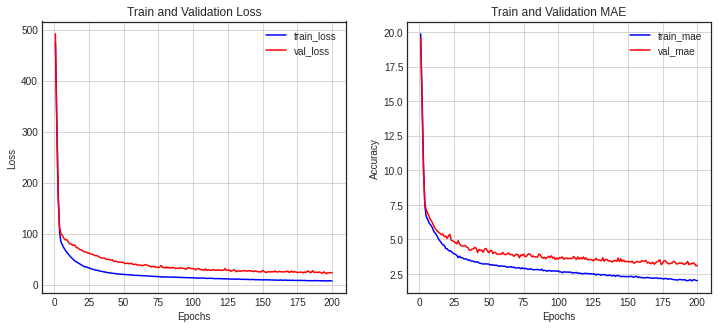

In [37]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [39]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 23.1065 - mae: 3.2488


[23.10650062561035, 3.248750686645508]